# Advanced usage

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

%pylab --no-import-all inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pytao import Tao, TaoModel, util, run_tao
from pytao.tao_ctypes.evaluate import evaluate_tao
import os

## Inititialize Tao

In [3]:
INPUT_FILE = os.path.expandvars('$ACC_ROOT_DIR/bmad-doc/tao_examples/csr_beam_tracking/tao.init')
assert os.path.exists(os.path.expandvars(INPUT_FILE))

## run_tao

In [4]:
M=run_tao(input_file=INPUT_FILE, ploton=True)
M

## evaluate_tao

In [5]:
res = evaluate_tao(settings={'csr_param:write_csr_wake':True,
                            'csr_param:ds_track_step':0.001}, 
                   input_file=INPUT_FILE, 
                   run_commands=['set global track_type=beam'],
                   expressions = ['lat::orbit.x[FF.PIP02A]', 'beam::norm_emit.x[end]'],
                   ploton=False, 
                   archive_csr_wake=True,
                   beam_archive_path = '.')
res

{'lat::orbit.x[FF.PIP02A]': array([0.]),
 'beam::norm_emit.x[end]': array([9.99823216e-07]),
 'beam_archive': '/Users/chrisonian/Code/GitHub/pytao/docs/examples/bmad_beam_b1fc930d99efd9cd968ae8ab11a76cf8.h5'}

In [6]:
from pmd_beamphysics import ParticleGroup, particle_paths
from h5py import File
afile = res['beam_archive']
h5 = File(afile, 'r')
ppaths = particle_paths(h5)
ppaths

['/data/00001/particles/',
 '/data/00002/particles/',
 '/data/00003/particles/',
 '/data/00004/particles/']

Note that csr_wake is in here

In [7]:
list(h5)

['csr_wake', 'data', 'expressions', 'input', 'settings']

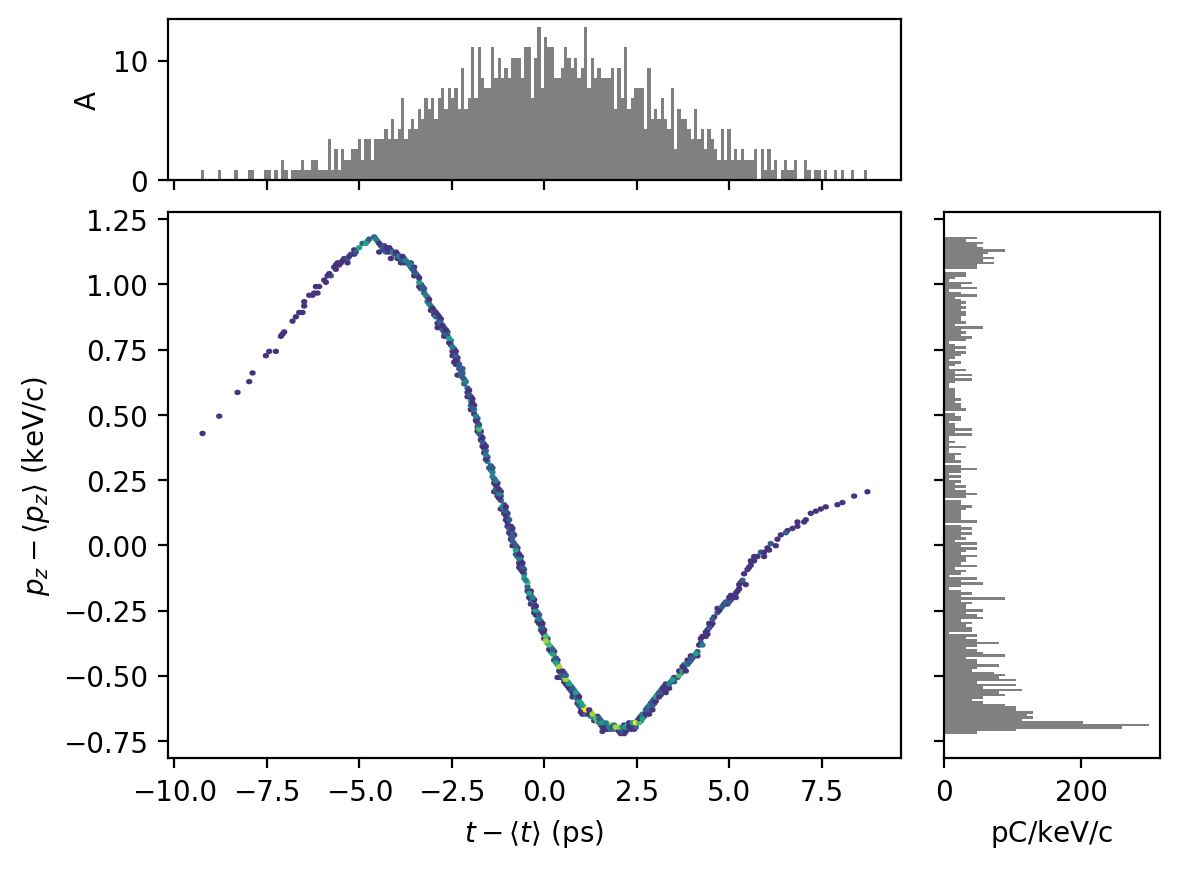

In [8]:
P = ParticleGroup(h5[ppaths[-1]])
P.plot('delta_t', 'delta_pz', bins=200)

In [9]:
os.remove(afile)

## evaluate examples

In [10]:
M.evaluate('lat::orbit.x[end]')

array([0.])

## csr_wake diagnostic file

In [11]:
from pytao.misc.csr import  read_csr_wake_data_h5, process_csr_wake_data
import numpy as np

csr_wake is stored in the HDF5 file

In [12]:
cdat = read_csr_wake_data_h5(h5)

This is the actual data

In [13]:
dat = cdat['3:FF.BEN01']['data']
dat.shape

(14, 40, 5)

This will process into a more useful form for data analysis.

In [14]:
pdat = process_csr_wake_data(cdat)

pdat['s_position']

array([0.      , 0.01    , 0.02    , 0.03    , 0.04    , 0.05    ,
       0.06    , 0.06    , 0.070231, 0.080462, 0.090692, 0.100923,
       0.111154, 0.121385, 0.131615, 0.141846, 0.152077, 0.162308,
       0.172538, 0.182769, 0.193   , 0.193   , 0.203   , 0.213   ,
       0.223   , 0.233   , 0.243   , 0.253   , 0.263   , 0.263   ,
       0.273167, 0.283333, 0.2935  , 0.303667, 0.313833, 0.324   ,
       0.334167, 0.344333, 0.3545  , 0.364667, 0.374833, 0.385   ,
       0.385   , 0.395   , 0.405   , 0.415   , 0.425   , 0.435   ,
       0.445   ])

In [15]:
from pytao.misc.csr_plot import plot_csr_wake, plot_csr_stats
from pytao.misc.csr import csr_wake_stats_at_step

In [16]:
from ipywidgets import interact
def plot1(step=0):
    plot_csr_wake(pdat, step=step)
nstep = len(pdat['z'])
interact(plot1, step=(0, nstep-1, 1) )

interactive(children=(IntSlider(value=0, description='step', max=48), Output()), _dom_classes=('widget-interac…

<function __main__.plot1(step=0)>

Check the s-position for each step

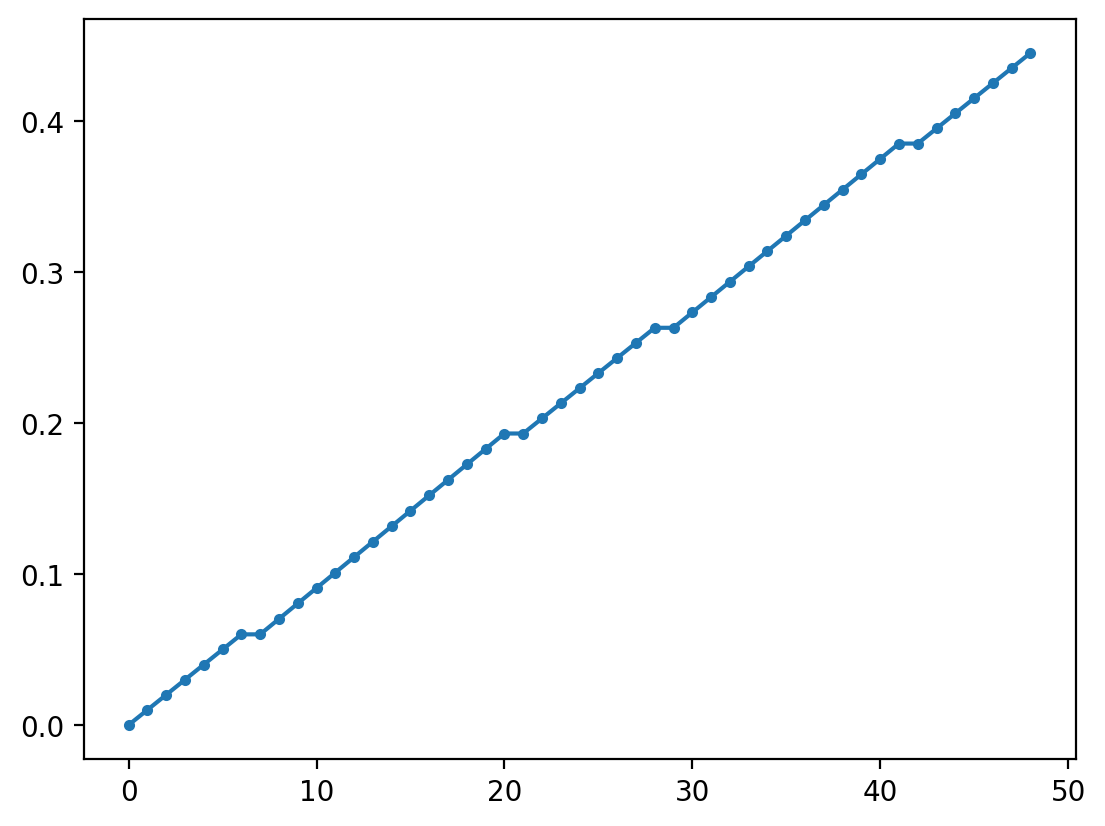

In [17]:
plt.plot(pdat['s_position'], marker='.')

Another convenience plot

(49, 4)


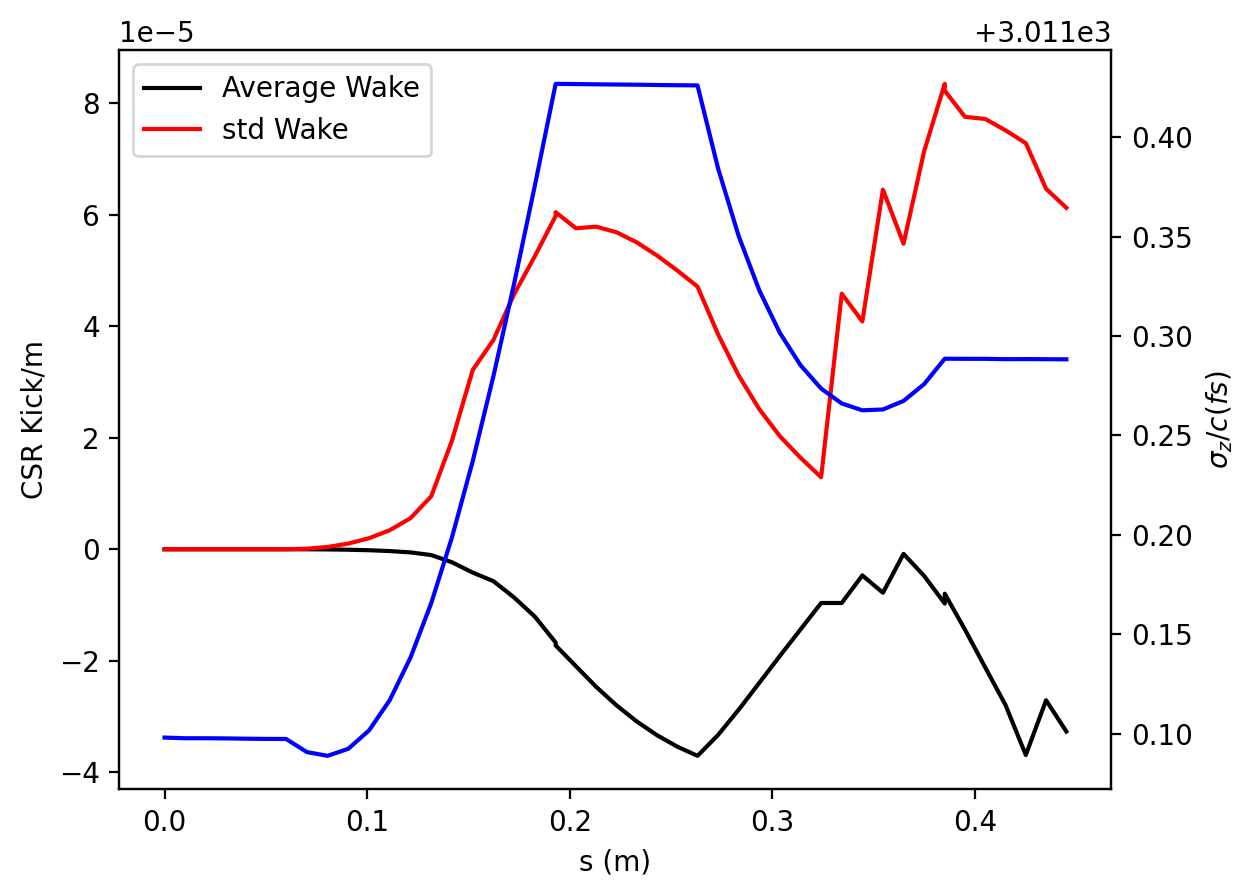

In [18]:
plot_csr_stats(pdat)  

Cleanup

In [19]:
!rm csr_wake.dat